In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

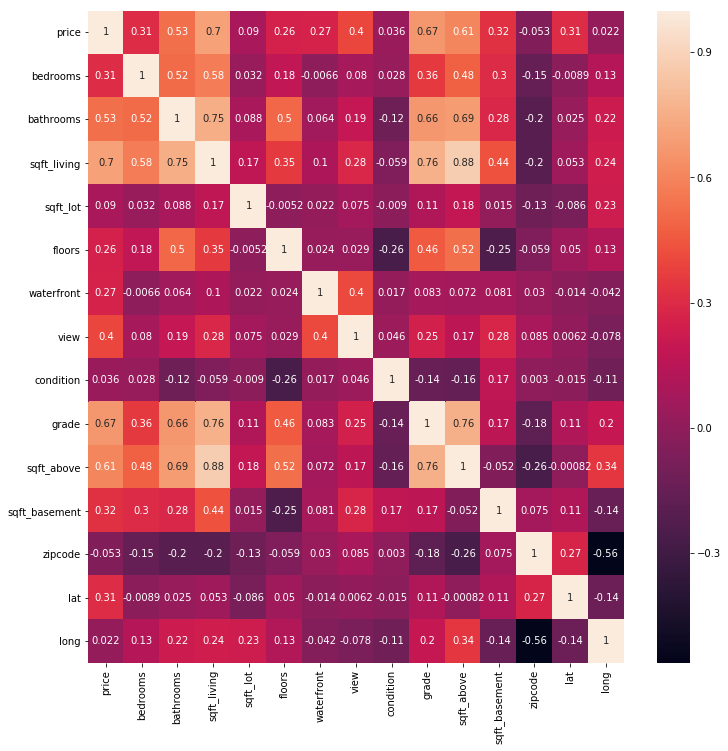

In [4]:
n=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[n]
df.head()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True,)

In [5]:
#categorical data
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['zipcode'] = data['zipcode'].astype('category',ordered=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

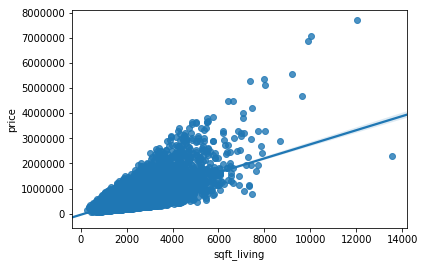

In [7]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price',data=data)

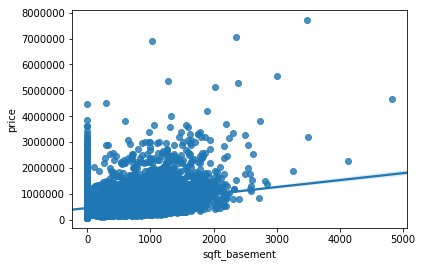

In [8]:
sns.regplot(x='sqft_basement',y='price',data=data)

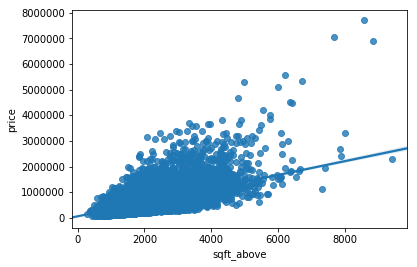

In [9]:
sns.regplot(x='sqft_above',y='price',data=data)

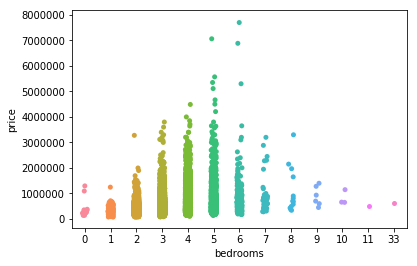

In [10]:
sns.stripplot(x='bedrooms', y='price',data=data)

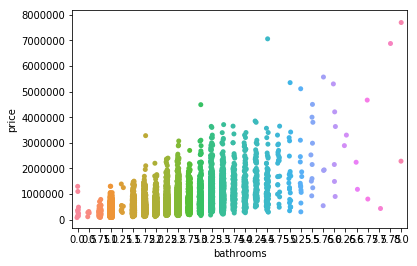

In [11]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

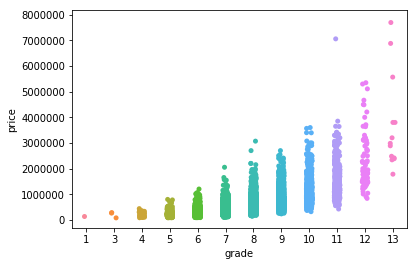

In [12]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [13]:
#We can remove outliers from data like house with bedrooms > 9 and bathrooms>7.
data=data[data['bedrooms'] < 10]
data=data[data['bathrooms']<8]
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]
df.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade
0,3,1.00,1180,1180,7
1,3,2.25,2570,2170,7
2,2,1.00,770,770,6
3,4,3.00,1960,1050,7
4,3,2.00,1680,1680,8


In [15]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1.00,1180,1180,0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,2170,0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,770,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,1050,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,1680,0,0,0,0,0,1,0,0,0,0,0


In [16]:
y=data['price']

In [17]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)
reg=LinearRegression()
reg.fit(x_train,y_train)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('Coefficients: \n', reg.coef_)
print(reg.score(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


58127859345.848854
Coefficients: 
 [-2.40123752e+04  1.18612408e+03  2.33256303e+02 -9.39663792e+01
  4.46669342e+04  5.62905144e+04  6.16023467e+04  8.28966221e+04
  1.14383769e+05  1.87484516e+05  3.32521890e+05  5.28281249e+05
  8.30136022e+05  1.33105258e+06  2.03634349e+06]
0.5945984881530678


In [18]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [19]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)
reg.fit(x_train,y_train)
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Coefficients: 
 [-1.18072628e+04  2.71087133e+04  1.49760731e+12  2.93162617e-01
 -3.05697108e+04 -1.49760731e+12 -1.49760731e+12 -3.12610956e+02
  2.23192703e+01  2.09992346e+05 -1.81884956e+05  1.58218994e+01
 -1.59912109e-01  5.48451900e+05  9.31132126e+04  7.70657437e+04
  1.41847604e+05  3.16327534e+05  8.49873272e+04  8.86488748e+04
  1.14726635e+05  1.55271759e+05  2.93557508e+04 -4.75959918e+04
 -8.94464910e+04 -9.16157264e+04 -8.70289094e+04 -6.54274703e+04
  1.01928117e+04  1.26787723e+05  3.29643009e+05  7.22654762e+05
  1.37780806e+06  1.97251491e+04 -1.13142540e+04  7.21991242e+05
  2.68319913e+05  2.22863834e+05  2.17451198e+05  2.30359100e+05
  1.04526212e+05  5.43003497e+04  8.90999423e+04  6.86305635e+04
  6.35840741e+04 -4.22080463e+04  1.73142688e+05  1.66442413e+05
  4.64101750e+04  2.20872408e+05  1.40042013e+04  1.46340474e+04
 -1.10984828e+04  2.98378447e+05  1.28687076e+05  7.00588809e+04
  1.11473612e+06  4.65323944e+05  2.40450959e+04  1.58072200e+05
  1.95055